In [1]:
#initializing
list_of_Trainloss_best_epoch=[0,0,0,0,0,0,0,0,0,0]
list_of_Validloss_best_epoch=[0,0,0,0,0,0,0,0,0,0]
list_of_Trainloss=[0,0,0,0,0,0,0,0,0,0]
list_of_Validloss=[0,0,0,0,0,0,0,0,0,0]
list_of_best_index=[0,0,0,0,0,0,0,0,0,0]
N_list_2=[]

In [173]:
N_list=[4000,8000,12000,16000,20000,24000,28000,32000,36000,40000]
N_list_2.append(N_list[len(N_list_2)])
# number of data
N=N_list_2[-1]
print(N)

40000


In [174]:
N_list=[4000,8000,12000,16000,20000,24000,28000,32000,36000,40000]
import matplotlib.pyplot as plt
import numpy as np
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


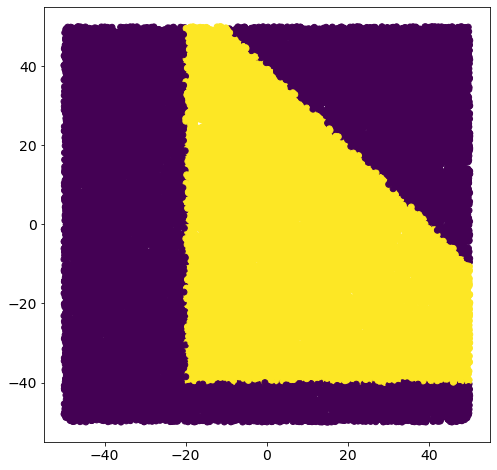

In [175]:
%run nonlinear_function.py

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [176]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

%run nonlinear_function.py

# training data
perc_train = 0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 40000
train: 32000


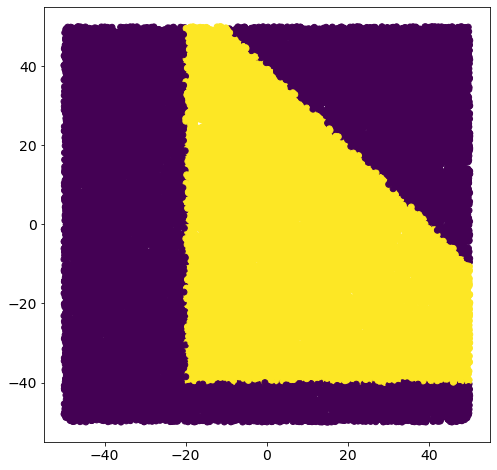

In [177]:
#keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

#dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [178]:
(x_train, y_train) = (x[0:N_train] , y[0:N_train])
(x_valid, y_valid) = (x[N_train:] , y[N_train:])
print('Train:',len(x_train),'\t Validation:',len(x_valid))

Train: 32000 	 Validation: 8000


In [179]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [180]:
#reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=500
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(3,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 2)                 6         
                                                                 
 dense_73 (Dense)            (None, 25)                75        
                                                                 
 dense_74 (Dense)            (None, 25)                650       
                                                                 
 dense_75 (Dense)            (None, 25)                650       
                                                                 
 dense_76 (Dense)            (None, 25)                650       
                                                                 
 dense_77 (Dense)            (None, 25)                650       
                                                                 
 dense_78 (Dense)            (None, 25)               

In [181]:
model.compile(loss='binary_crossentropy',
               #optimizer="RMSprop",
               optimizer='adam',
               metrics=['accuracy'])

In [182]:
fit = model.fit(x_train, y_train,
                epochs = nepoch, batch_size = 90,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/500
356/356 - 2s - loss: 0.2404 - accuracy: 0.8869 - val_loss: 0.0767 - val_accuracy: 0.9644 - 2s/epoch - 7ms/step
Epoch 2/500
356/356 - 1s - loss: 0.0588 - accuracy: 0.9752 - val_loss: 0.0711 - val_accuracy: 0.9688 - 787ms/epoch - 2ms/step
Epoch 3/500
356/356 - 1s - loss: 0.0455 - accuracy: 0.9801 - val_loss: 0.0397 - val_accuracy: 0.9806 - 779ms/epoch - 2ms/step
Epoch 4/500
356/356 - 1s - loss: 0.0489 - accuracy: 0.9809 - val_loss: 0.0392 - val_accuracy: 0.9858 - 787ms/epoch - 2ms/step
Epoch 5/500
356/356 - 1s - loss: 0.0388 - accuracy: 0.9839 - val_loss: 0.0404 - val_accuracy: 0.9812 - 776ms/epoch - 2ms/step
Epoch 6/500
356/356 - 1s - loss: 0.0421 - accuracy: 0.9822 - val_loss: 0.0360 - val_accuracy: 0.9814 - 794ms/epoch - 2ms/step
Epoch 7/500
356/356 - 1s - loss: 0.0324 - accuracy: 0.9864 - val_loss: 0.0436 - val_accuracy: 0.9811 - 882ms/epoch - 2ms/step
Epoch 8/500
356/356 - 1s - loss: 0.0375 - accuracy: 0.9835 - val_loss: 0.0408 - val_accuracy: 0.9837 - 787ms/epoch - 2ms/

Epoch 66/500
356/356 - 1s - loss: 0.0236 - accuracy: 0.9900 - val_loss: 0.0147 - val_accuracy: 0.9950 - 790ms/epoch - 2ms/step
Epoch 67/500
356/356 - 1s - loss: 0.0203 - accuracy: 0.9910 - val_loss: 0.0194 - val_accuracy: 0.9918 - 799ms/epoch - 2ms/step
Epoch 68/500
356/356 - 1s - loss: 0.0252 - accuracy: 0.9903 - val_loss: 0.0113 - val_accuracy: 0.9955 - 804ms/epoch - 2ms/step
Epoch 69/500
356/356 - 1s - loss: 0.0223 - accuracy: 0.9905 - val_loss: 0.0213 - val_accuracy: 0.9905 - 790ms/epoch - 2ms/step
Epoch 70/500
356/356 - 1s - loss: 0.0235 - accuracy: 0.9903 - val_loss: 0.0169 - val_accuracy: 0.9923 - 789ms/epoch - 2ms/step
Epoch 71/500
356/356 - 1s - loss: 0.0222 - accuracy: 0.9907 - val_loss: 0.0187 - val_accuracy: 0.9914 - 793ms/epoch - 2ms/step
Epoch 72/500
356/356 - 1s - loss: 0.0218 - accuracy: 0.9910 - val_loss: 0.0145 - val_accuracy: 0.9935 - 783ms/epoch - 2ms/step
Epoch 73/500
356/356 - 1s - loss: 0.0224 - accuracy: 0.9902 - val_loss: 0.0175 - val_accuracy: 0.9924 - 790ms/e

Epoch 131/500
356/356 - 1s - loss: 0.0184 - accuracy: 0.9919 - val_loss: 0.0239 - val_accuracy: 0.9896 - 780ms/epoch - 2ms/step
Epoch 132/500
356/356 - 1s - loss: 0.0196 - accuracy: 0.9915 - val_loss: 0.0133 - val_accuracy: 0.9936 - 781ms/epoch - 2ms/step
Epoch 133/500
356/356 - 1s - loss: 0.0185 - accuracy: 0.9922 - val_loss: 0.0155 - val_accuracy: 0.9941 - 781ms/epoch - 2ms/step
Epoch 134/500
356/356 - 1s - loss: 0.0207 - accuracy: 0.9915 - val_loss: 0.0182 - val_accuracy: 0.9914 - 772ms/epoch - 2ms/step
Epoch 135/500
356/356 - 1s - loss: 0.0181 - accuracy: 0.9923 - val_loss: 0.0145 - val_accuracy: 0.9935 - 779ms/epoch - 2ms/step
Epoch 136/500
356/356 - 1s - loss: 0.0197 - accuracy: 0.9917 - val_loss: 0.0245 - val_accuracy: 0.9914 - 780ms/epoch - 2ms/step
Epoch 137/500
356/356 - 1s - loss: 0.0166 - accuracy: 0.9931 - val_loss: 0.0088 - val_accuracy: 0.9966 - 776ms/epoch - 2ms/step
Epoch 138/500
356/356 - 1s - loss: 0.0197 - accuracy: 0.9921 - val_loss: 0.0190 - val_accuracy: 0.9924 -

356/356 - 1s - loss: 0.0155 - accuracy: 0.9934 - val_loss: 0.0130 - val_accuracy: 0.9945 - 644ms/epoch - 2ms/step
Epoch 196/500
356/356 - 1s - loss: 0.0163 - accuracy: 0.9935 - val_loss: 0.0139 - val_accuracy: 0.9927 - 642ms/epoch - 2ms/step
Epoch 197/500
356/356 - 1s - loss: 0.0144 - accuracy: 0.9939 - val_loss: 0.0126 - val_accuracy: 0.9939 - 634ms/epoch - 2ms/step
Epoch 198/500
356/356 - 1s - loss: 0.0145 - accuracy: 0.9940 - val_loss: 0.0110 - val_accuracy: 0.9956 - 667ms/epoch - 2ms/step
Epoch 199/500
356/356 - 1s - loss: 0.0170 - accuracy: 0.9929 - val_loss: 0.0082 - val_accuracy: 0.9966 - 637ms/epoch - 2ms/step
Epoch 200/500
356/356 - 1s - loss: 0.0172 - accuracy: 0.9931 - val_loss: 0.0084 - val_accuracy: 0.9967 - 656ms/epoch - 2ms/step
Epoch 201/500
356/356 - 1s - loss: 0.0160 - accuracy: 0.9930 - val_loss: 0.0136 - val_accuracy: 0.9940 - 635ms/epoch - 2ms/step
Epoch 202/500
356/356 - 1s - loss: 0.0158 - accuracy: 0.9935 - val_loss: 0.0127 - val_accuracy: 0.9941 - 657ms/epoch -

Epoch 260/500
356/356 - 1s - loss: 0.0157 - accuracy: 0.9937 - val_loss: 0.0158 - val_accuracy: 0.9939 - 625ms/epoch - 2ms/step
Epoch 261/500
356/356 - 1s - loss: 0.0153 - accuracy: 0.9937 - val_loss: 0.0141 - val_accuracy: 0.9941 - 627ms/epoch - 2ms/step
Epoch 262/500
356/356 - 1s - loss: 0.0153 - accuracy: 0.9934 - val_loss: 0.0115 - val_accuracy: 0.9944 - 633ms/epoch - 2ms/step
Epoch 263/500
356/356 - 1s - loss: 0.0164 - accuracy: 0.9933 - val_loss: 0.0080 - val_accuracy: 0.9964 - 645ms/epoch - 2ms/step
Epoch 264/500
356/356 - 1s - loss: 0.0158 - accuracy: 0.9934 - val_loss: 0.0088 - val_accuracy: 0.9965 - 624ms/epoch - 2ms/step
Epoch 265/500
356/356 - 1s - loss: 0.0153 - accuracy: 0.9933 - val_loss: 0.0139 - val_accuracy: 0.9946 - 627ms/epoch - 2ms/step
Epoch 266/500
356/356 - 1s - loss: 0.0167 - accuracy: 0.9932 - val_loss: 0.0106 - val_accuracy: 0.9959 - 627ms/epoch - 2ms/step
Epoch 267/500
356/356 - 1s - loss: 0.0166 - accuracy: 0.9926 - val_loss: 0.0111 - val_accuracy: 0.9960 -

356/356 - 1s - loss: 0.0159 - accuracy: 0.9939 - val_loss: 0.0156 - val_accuracy: 0.9927 - 630ms/epoch - 2ms/step
Epoch 325/500
356/356 - 1s - loss: 0.0148 - accuracy: 0.9938 - val_loss: 0.0122 - val_accuracy: 0.9940 - 630ms/epoch - 2ms/step
Epoch 326/500
356/356 - 1s - loss: 0.0146 - accuracy: 0.9934 - val_loss: 0.0090 - val_accuracy: 0.9956 - 625ms/epoch - 2ms/step
Epoch 327/500
356/356 - 1s - loss: 0.0134 - accuracy: 0.9941 - val_loss: 0.0356 - val_accuracy: 0.9891 - 625ms/epoch - 2ms/step
Epoch 328/500
356/356 - 1s - loss: 0.0127 - accuracy: 0.9948 - val_loss: 0.0054 - val_accuracy: 0.9983 - 628ms/epoch - 2ms/step
Epoch 329/500
356/356 - 1s - loss: 0.0144 - accuracy: 0.9942 - val_loss: 0.0120 - val_accuracy: 0.9952 - 629ms/epoch - 2ms/step
Epoch 330/500
356/356 - 1s - loss: 0.0136 - accuracy: 0.9943 - val_loss: 0.0123 - val_accuracy: 0.9954 - 627ms/epoch - 2ms/step
Epoch 331/500
356/356 - 1s - loss: 0.0142 - accuracy: 0.9947 - val_loss: 0.0239 - val_accuracy: 0.9902 - 628ms/epoch -

Epoch 389/500
356/356 - 1s - loss: 0.0131 - accuracy: 0.9943 - val_loss: 0.0133 - val_accuracy: 0.9940 - 808ms/epoch - 2ms/step
Epoch 390/500
356/356 - 1s - loss: 0.0135 - accuracy: 0.9942 - val_loss: 0.0085 - val_accuracy: 0.9965 - 958ms/epoch - 3ms/step
Epoch 391/500
356/356 - 1s - loss: 0.0136 - accuracy: 0.9942 - val_loss: 0.0123 - val_accuracy: 0.9944 - 1s/epoch - 3ms/step
Epoch 392/500
356/356 - 1s - loss: 0.0135 - accuracy: 0.9946 - val_loss: 0.0084 - val_accuracy: 0.9960 - 904ms/epoch - 3ms/step
Epoch 393/500
356/356 - 1s - loss: 0.0142 - accuracy: 0.9942 - val_loss: 0.0074 - val_accuracy: 0.9971 - 960ms/epoch - 3ms/step
Epoch 394/500
356/356 - 1s - loss: 0.0142 - accuracy: 0.9941 - val_loss: 0.0068 - val_accuracy: 0.9979 - 684ms/epoch - 2ms/step
Epoch 395/500
356/356 - 1s - loss: 0.0120 - accuracy: 0.9950 - val_loss: 0.0123 - val_accuracy: 0.9962 - 701ms/epoch - 2ms/step
Epoch 396/500
356/356 - 1s - loss: 0.0147 - accuracy: 0.9941 - val_loss: 0.0116 - val_accuracy: 0.9949 - 76

Epoch 454/500
356/356 - 1s - loss: 0.0129 - accuracy: 0.9948 - val_loss: 0.0147 - val_accuracy: 0.9939 - 671ms/epoch - 2ms/step
Epoch 455/500
356/356 - 1s - loss: 0.0141 - accuracy: 0.9941 - val_loss: 0.0111 - val_accuracy: 0.9955 - 631ms/epoch - 2ms/step
Epoch 456/500
356/356 - 1s - loss: 0.0113 - accuracy: 0.9952 - val_loss: 0.0253 - val_accuracy: 0.9885 - 614ms/epoch - 2ms/step
Epoch 457/500
356/356 - 1s - loss: 0.0133 - accuracy: 0.9943 - val_loss: 0.0088 - val_accuracy: 0.9960 - 615ms/epoch - 2ms/step
Epoch 458/500
356/356 - 1s - loss: 0.0127 - accuracy: 0.9948 - val_loss: 0.0080 - val_accuracy: 0.9969 - 612ms/epoch - 2ms/step
Epoch 459/500
356/356 - 1s - loss: 0.0127 - accuracy: 0.9950 - val_loss: 0.0120 - val_accuracy: 0.9945 - 609ms/epoch - 2ms/step
Epoch 460/500
356/356 - 1s - loss: 0.0126 - accuracy: 0.9947 - val_loss: 0.0076 - val_accuracy: 0.9973 - 610ms/epoch - 2ms/step
Epoch 461/500
356/356 - 1s - loss: 0.0138 - accuracy: 0.9952 - val_loss: 0.0090 - val_accuracy: 0.9962 -

In [183]:
validation_loss = np.array(fit.history['val_loss'])
Training_loss = np.array(fit.history['loss'])
t=0
while (t==0) and (len(Training_loss)!=0):
    index = np.argmin(Training_loss)
    if fit.history['loss'][index]>=fit.history['val_loss'][index]:
        index_of_best_model=index
        t=1
        print(index)
    else:
        Training_loss=np.delete(Training_loss,index)
        
print(index_of_best_model)

416
416


In [184]:
        
list_of_best_index[N_list.index(N)]=index_of_best_model
list_of_Trainloss_best_epoch[N_list.index(N)]=fit.history['loss'][index_of_best_model]
list_of_Validloss_best_epoch[N_list.index(N)]=fit.history['val_loss'][index_of_best_model]
list_of_Trainloss[N_list.index(N)]=fit.history['loss'][-1]
list_of_Validloss[N_list.index(N)]=fit.history['val_loss'][-1]
print(list_of_best_index)


[337, 497, 411, 471, 478, 469, 415, 437, 448, 416]


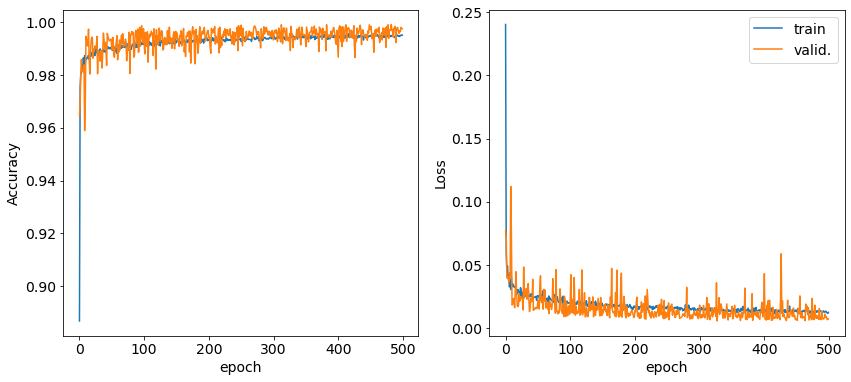

In [185]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
plt.savefig('plot_of _increase' + str(N_list.index(N)) + '.png')




In [186]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE
print(np.var(X1))
grid_r = grid/50
print(grid_r)

pred = model.predict(grid_r)

51 2601
[50. 50.]
866.6666666666666
[[-1.   -1.  ]
 [-0.96 -1.  ]
 [-0.92 -1.  ]
 ...
 [ 0.92  1.  ]
 [ 0.96  1.  ]
 [ 1.    1.  ]]


9


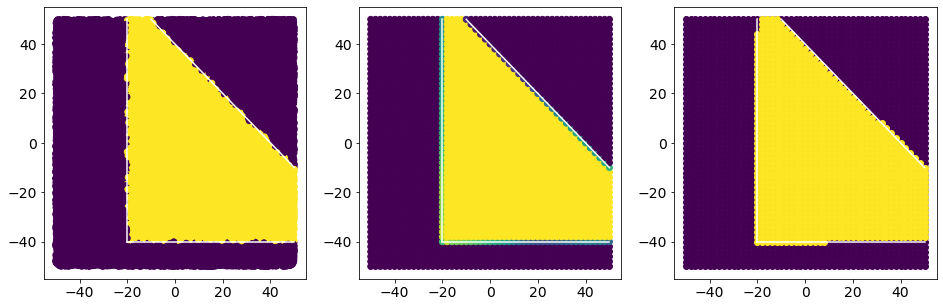

In [187]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show
plt.savefig('result_of _increase' + str(N_list.index(N)) + '.png')
print(N_list.index(N))

In [188]:
print("Trainloss",list_of_Trainloss)
print("Validloss",list_of_Validloss)
np.savetxt(filename("Trainloss_increase",TYPE),list_of_Trainloss)
np.savetxt(filename("Validloss_increase",TYPE),list_of_Validloss)


Trainloss [0.01926039159297943, 0.014391027390956879, 0.018628926947712898, 0.01701236143708229, 0.015496870502829552, 0.014066621661186218, 0.014023489318788052, 0.012913474813103676, 0.01282847486436367, 0.01226579025387764]
Validloss [0.019107241183519363, 0.01891152188181877, 0.010747116059064865, 0.012566233985126019, 0.009214919060468674, 0.014257022179663181, 0.008344558998942375, 0.024701032787561417, 0.01125000137835741, 0.00694543682038784]


In [189]:
print("Trainloss_best_epoch",list_of_Trainloss_best_epoch)
print("Validloss_best_epoch",list_of_Validloss_best_epoch)
np.savetxt(filename("Trainloss_increase_best_epoch",TYPE),list_of_Trainloss_best_epoch)
np.savetxt(filename("Validloss_increase_best_epoch",TYPE),list_of_Validloss_best_epoch)

Trainloss_best_epoch [0.0156088937073946, 0.024379439651966095, 0.013820338062942028, 0.01707744598388672, 0.01590964011847973, 0.012387984432280064, 0.014519041404128075, 0.011041603982448578, 0.011292316019535065, 0.010995818302035332]
Validloss_best_epoch [0.00847310945391655, 0.019125409424304962, 0.008205551654100418, 0.015575014054775238, 0.013034725561738014, 0.009546934626996517, 0.013271546922624111, 0.011022920720279217, 0.008114250376820564, 0.00752621702849865]


(array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

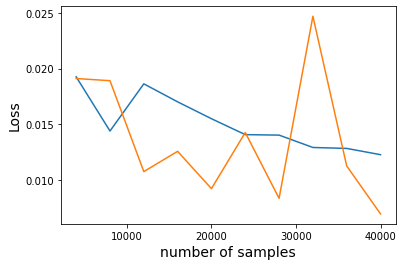

In [190]:
plt.plot(N_list,list_of_Trainloss)
plt.plot(N_list,list_of_Validloss)
plt.xlabel("number of samples")
plt.ylabel("Loss")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.savefig('plot_increase.png')



(array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

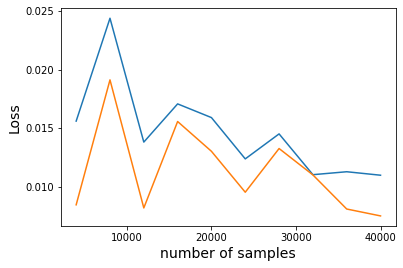

In [191]:
plt.plot(N_list,list_of_Trainloss_best_epoch)
plt.plot(N_list,list_of_Validloss_best_epoch)
plt.xlabel("number of samples")
plt.ylabel("Loss")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

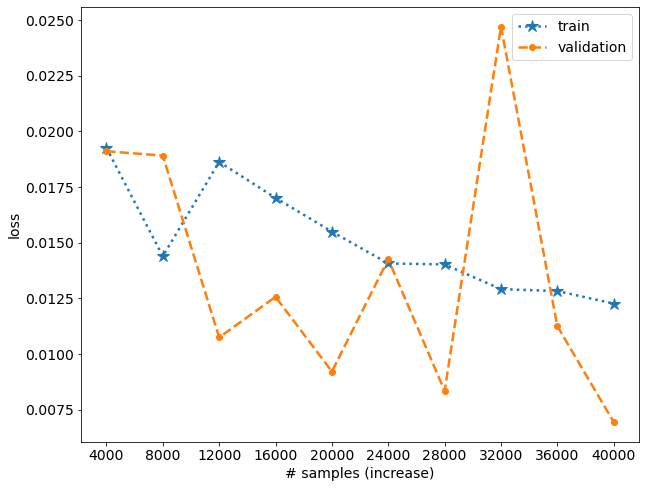

In [192]:
def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"
TYPE=1
import numpy as np
import matplotlib.pyplot as plt
x = np.loadtxt(filename("Trainloss_increase",TYPE), delimiter=' ')
y = np.loadtxt(filename("Validloss_increase",TYPE), delimiter=' ')
N_list=[4000,8000,12000,16000,20000,24000,28000,32000,36000,40000]

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(N_list, x, label = 'train', linestyle = 'dotted', marker = '*', markersize = 12,linewidth ='2.5')
ax.plot(N_list, y, label = 'validation',linestyle = 'dashed', marker = '.',markersize = 12, linewidth ='2.5')
ax.set_xlabel('# samples (increase)')
ax.set_ylabel('loss')
#plt.xticks(N_list)
ax.set_xticks(N_list)

ax.set_xticklabels(N_list)

plt.legend(loc = 'best')
plt.savefig('plot_increase.png')

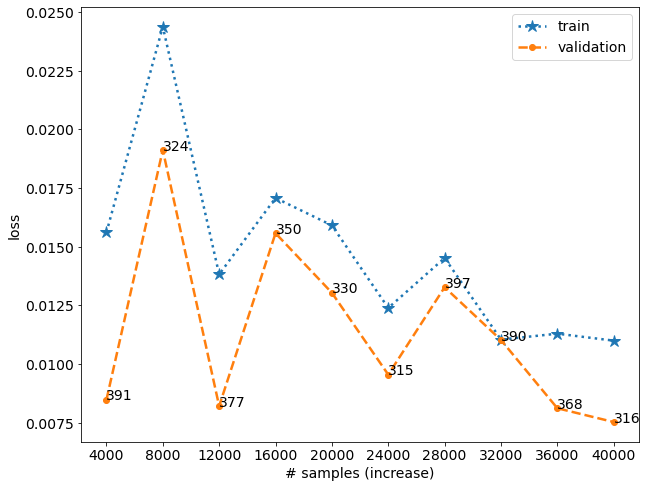

In [193]:
x = np.loadtxt(filename("Trainloss_increase_best_epoch",TYPE), delimiter=' ')
y = np.loadtxt(filename("Validloss_increase_best_epoch",TYPE), delimiter=' ')
N_list=[4000,8000,12000,16000,20000,24000,28000,32000,36000,40000]
list_of_best_index=[391, 324, 377, 350, 330, 315, 397, 390, 368, 316]
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(N_list, x, label = 'train', linestyle = 'dotted', marker = '*', markersize = 12,linewidth ='2.5')
ax.plot(N_list, y, label = 'validation',linestyle = 'dashed', marker = '.',markersize = 12, linewidth ='2.5')
ax.set_xlabel('# samples (increase)')
ax.set_ylabel('loss')
#plt.xticks(N_list)
ax.set_xticks(N_list)

ax.set_xticklabels(N_list)

for i, txt in enumerate(list_of_best_index):
    ax.annotate(txt, xy = (N_list[i], y[i]))
plt.legend(loc = 'best')
plt.savefig('plot_increase_best_epoch.png')